In [15]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# STEP 2: Memuat Dataset
import pandas as pd

# Ganti path berikut sesuai dengan lokasi file di Google Drive
file_path = '/content/drive/MyDrive/Dataset/CreditDataset.csv'

# Membaca dataset
data = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")
data.head()

Dataset Loaded Successfully!


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [17]:
# STEP 3 (Revisi): Pra-pemrosesan Data
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y)
X = data.drop('Class', axis=1)  # 'Class' adalah nama kolom label
y = data['Class']

# Mengonversi fitur non-numerik menjadi numerik (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (800, 48), Testing Data: (200, 48)


In [18]:
# STEP 4: Pelatihan Model
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi dan pelatihan model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.74
Precision: 0.62
Recall: 0.34
F1 Score: 0.44
AUC: 0.79


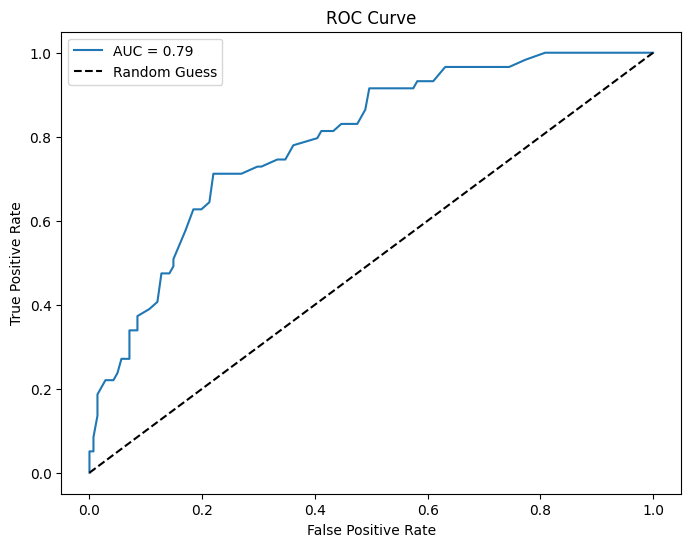

In [20]:
# STEP 5: Evaluasi Model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=2)  # Label positif adalah 2
recall = recall_score(y_test, y_pred, pos_label=2)        # Label positif adalah 2
f1 = f1_score(y_test, y_pred, pos_label=2)                # Label positif adalah 2
auc = roc_auc_score(y_test, y_proba)  # AUC sudah otomatis menghitung dengan benar

# Menampilkan hasil
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=2)  # Label positif adalah 2
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


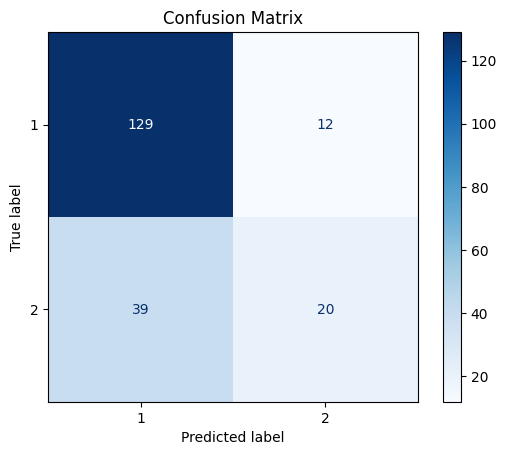

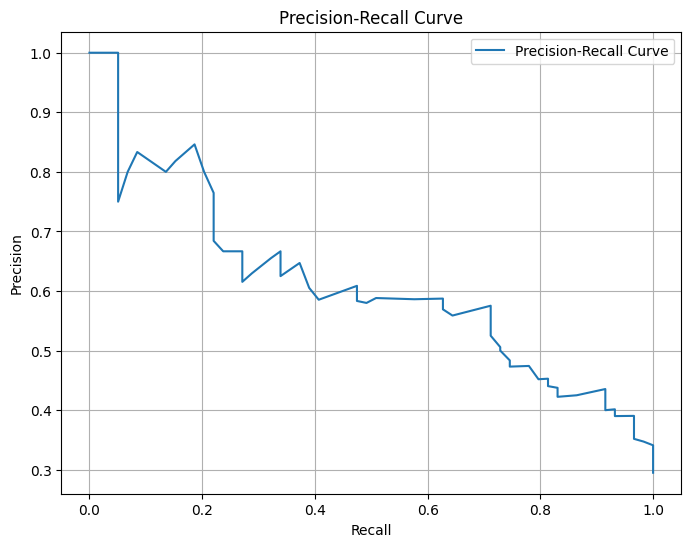

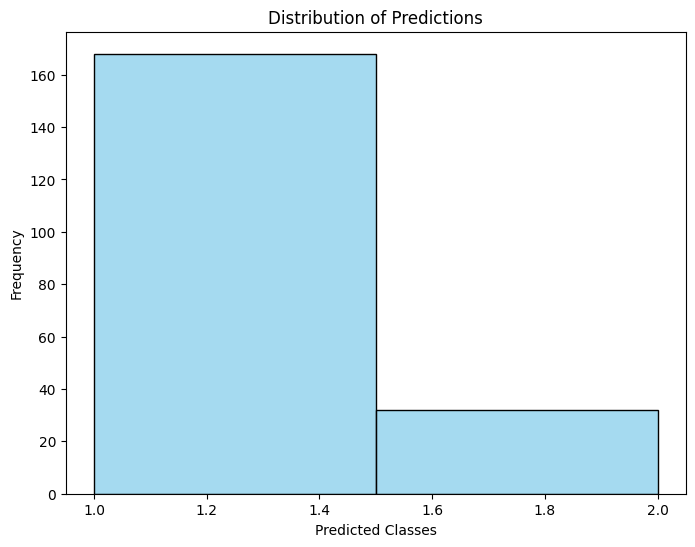

<ipython-input-22-a1295773e1c9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.classes_, y=class_accuracy, palette='viridis')


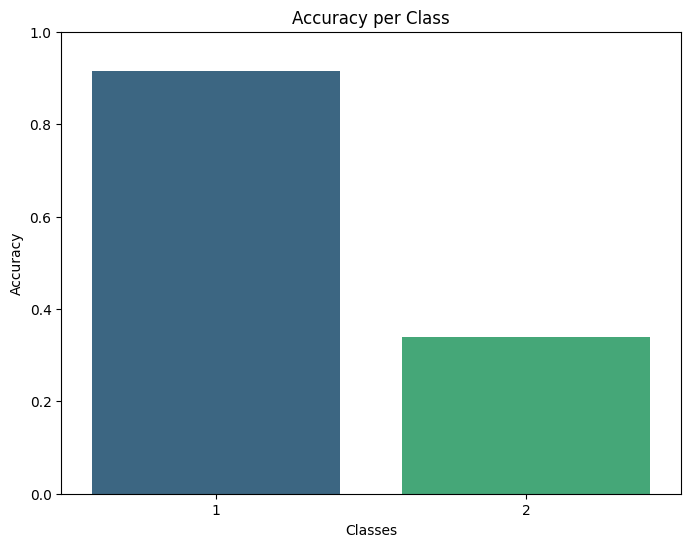

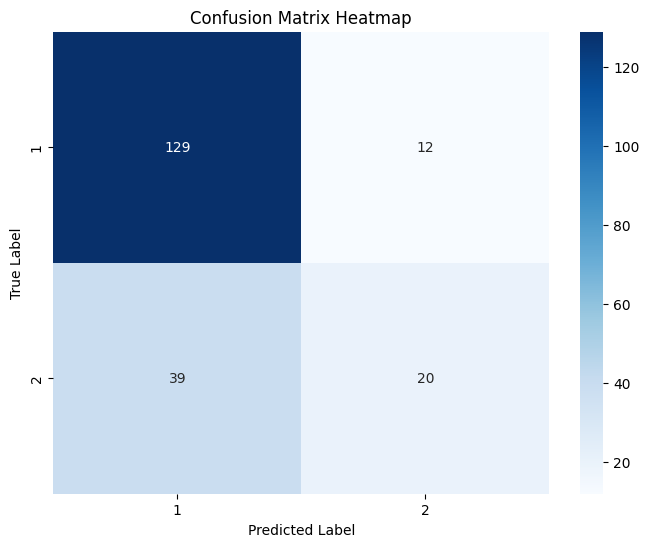

In [22]:
# STEP 5 (lanjutan): Evaluasi dan Visualisasi Model
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=2)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# Histogram: Distribusi Prediksi
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=len(set(y_pred)), kde=False, color='skyblue', edgecolor='black')
plt.title("Distribution of Predictions")
plt.xlabel("Predicted Classes")
plt.ylabel("Frequency")
plt.show()

# Bar Plot: Akurasi per Kelas (Jika multiclass)
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x=model.classes_, y=class_accuracy, palette='viridis')
plt.title("Accuracy per Class")
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Heatmap untuk Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()